In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
penguins = sns.load_dataset('penguins')

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
penguins = penguins.dropna()

In [8]:
features = ['body_mass_g']

In [9]:
dt = DecisionTreeClassifier(max_depth = 4)

In [17]:
dt.fit(penguins[features], penguins['species'])

DecisionTreeClassifier(max_depth=4)

In [18]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

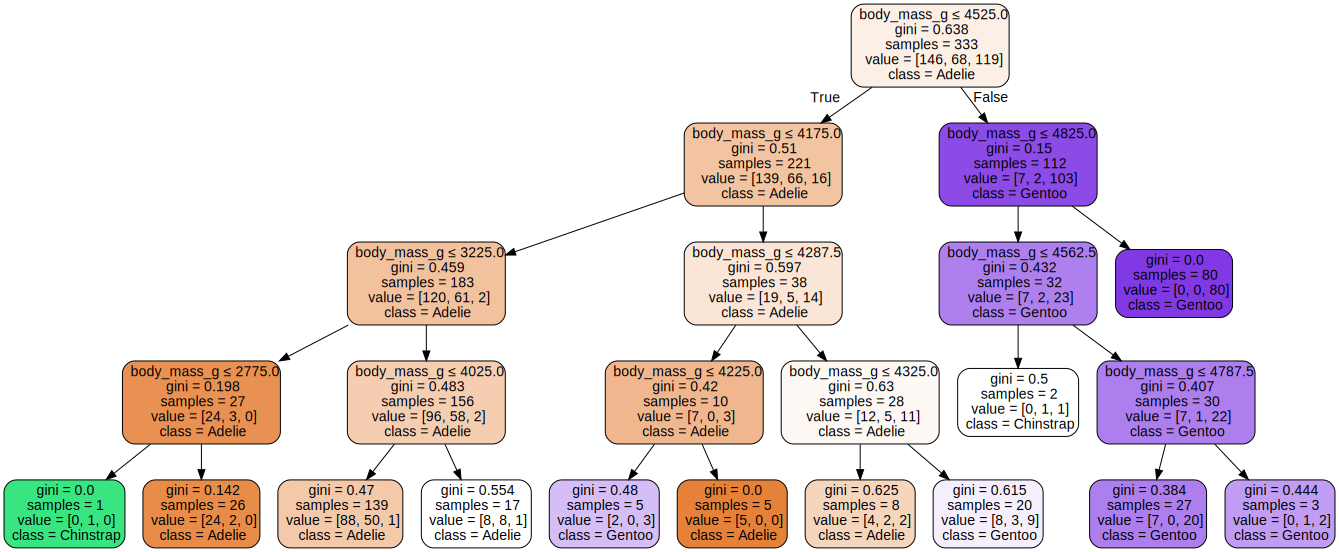

In [25]:
plot_tree_classification(dt, features, penguins.species.unique())

In [26]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [27]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [28]:
features= ['body_mass_g']
dt_classification = DecisionTreeClassifier(max_depth = 1) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=1)

In [30]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

In [31]:
accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

In [32]:
print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7253218884120172
Accuracy on test set 0.73
